In [4]:
# !pip install pymysql
# !pip install pymssql

import LibData
import LibUtils
import LibML
import LibFile

import pandas as pd
import numpy as np


In [7]:

jobName = '201216_Train_split1'

x, y = LibData.GetXYBase(jobName)
# x = LibData.GetMoneyness(x)
# x = LibData.GetAttainedAge(x)
# x = LibData.GetIrReduction(x)
# x = LibEE.GetX_Inter_EM_AA(x)
# x = LibEE.GetXEmbApplied(3, x, y, ['ProdCode', 'Inter_EM_AA'])
# scaler, x = LibUtils.ScaleStandard(x)

x_final = pd.read_csv('x.csv')

dtTSNE = pd.concat([x["ProdCode"], x_final[['ee_ProdCode_00', 'ee_ProdCode_01', 'ee_ProdCode_02']]], axis=1)
dtTSNE.to_csv('xTSNE.csv', index=False)

In [1]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import seaborn as sns


In [5]:
dt = pd.read_csv('xTSNE.csv')
dt = dt.groupby(['ProdCode'], as_index=False).first()
dt

,ProdCode,ee_ProdCode_00,ee_ProdCode_01,ee_ProdCode_02
0,0,-1.260678,-0.952844,-0.943677
1,1,-1.257245,-1.024757,-0.947229
2,2,-1.149921,-1.080786,-1.038619
3,3,0.240931,-1.404730,-1.074902
4,4,2.093993,-0.723385,2.038894
5,5,1.666423,-0.794937,1.619246
6,6,1.104374,-0.818379,1.374526
7,7,0.983029,-0.801992,1.205648
8,8,-0.659205,1.322361,-0.268843
9,9,-0.742498,1.402600,-0.254536


In [26]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(dt[['ee_ProdCode_00','ee_ProdCode_01','ee_ProdCode_02']])
tsne_result

df_tsne = pd.DataFrame({ '1d' : tsne_result[:,0], '2d' : tsne_result[:,1], 'y' : dt['ProdCode'] })


[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.001s...
[t-SNE] Computed neighbors for 16 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.953949
[t-SNE] KL divergence after 300 iterations: 0.380002


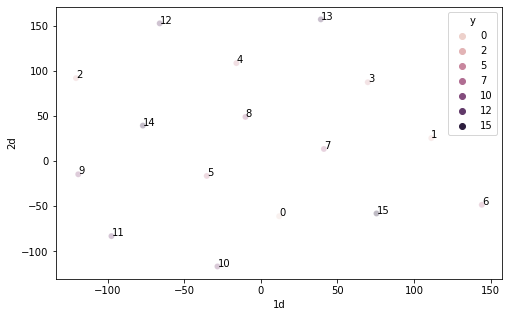

In [27]:

plt.figure(figsize=(8,5))
p1 = sns.scatterplot(x="1d" ,y="2d", hue="y", data=df_tsne, legend='auto', alpha=0.3) #palette=sns.color_palette("hls",10)

for line in range(0, 16):
    p1.text(df_tsne['1d'][line]+0.01, df_tsne['2d'][line], df_tsne['y'][line])

plt.show()

In [21]:
help(sns.scatterplot)

Help on function scatterplot in module seaborn.relational:

scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can